In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
import re
import numpy as np
from collections import Counter

## Loading

In [2]:
df = pd.read_csv("./train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df_test = pd.read_csv('./test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Analysis

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# df.drop(columns=['PassengerId'], inplace=True)
# df_test.drop(columns=['PassengerId'], inplace=True)

In [7]:
name = df["Name"]
name_test = df_test["Name"]
name[0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [8]:
r = re.compile(".+,\s(?P<Salutation>\w+)\..+")
match = r.match(name[1])
match.group('Salutation')

'Mrs'

In [9]:
salutations = [m.group('Salutation') for m in (r.match(v) for v in name) if m]
salutations_test = [m.group('Salutation') for m in (r.match(v) for v in name_test) if m]
print(Counter(salutations))
print(Counter(salutations_test))

Counter({'Mr': 517, 'Miss': 182, 'Mrs': 125, 'Master': 40, 'Dr': 7, 'Rev': 6, 'Major': 2, 'Mlle': 2, 'Col': 2, 'Don': 1, 'Mme': 1, 'Ms': 1, 'Lady': 1, 'Sir': 1, 'Capt': 1, 'Jonkheer': 1})
Counter({'Mr': 240, 'Miss': 78, 'Mrs': 72, 'Master': 21, 'Col': 2, 'Rev': 2, 'Ms': 1, 'Dr': 1, 'Dona': 1})


In [10]:
S_train = set(salutations)
S_test = set(salutations_test)
common = S_train.intersection(S_test)
diff = S_train.difference(S_test)
diff = diff.union(S_test.difference(S_train))
diff = list(diff)

In [11]:
salutations = pd.DataFrame(salutations, columns=["Salutations"])
salutations_test = pd.DataFrame(salutations_test, columns=["Salutations"])

In [12]:
func = lambda x: x if x in common else 'Others'
salutations['Salutations'] = salutations['Salutations'].apply(func)
salutations_test['Salutations'] = salutations_test['Salutations'].apply(func)

In [13]:
df = pd.concat([df, salutations], axis=1)
df_test = pd.concat([df_test, salutations_test], axis=1)
df.loc[890, "Salutations"] = "Mr"
df.drop(columns=["Name"], inplace=True)
df_test.drop(columns=["Name"], inplace=True)
df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked Salutations  
0           A/5 21171   7.2500   NaN        S          Mr  
1            PC 17599  71.2833   C85        C         Mrs  
2    STON/O2. 3101282   7.9250   NaN        S        Miss  
3              113803  53.1000  C123        S         Mrs  
4              373450   8.0500   NaN        S          Mr  
..                ...      ...   ...      ...         ...  
886            211536  13.0000   NaN        S        Miss  
887            112053  30.0000   B42        S        Miss  
888        W./C. 6607  23.4500   NaN        S          Mr  
889            111369  30.0000  C148        C          Mr  
890            370376   7.7500   NaN        Q          Mr  

[891 rows x 12 columns]

In [14]:
Y = df.loc[:, "Survived"]
# df.drop(columns=["Survived"], axis=1, inplace=True)

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Salutations      0
dtype: int64

In [16]:
df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked Salutations  
0           A/5 21171   7.2500   NaN        S          Mr  
1            PC 17599  71.2833   C85        C         Mrs  
2    STON/O2. 3101282   7.9250   NaN        S        Miss  
3              113803  53.1000  C123        S         Mrs  
4              373450   8.0500   NaN        S          Mr  
..                ...      ...   ...      ...         ...  
886            211536  13.0000   NaN        S        Miss  
887            112053  30.0000   B42        S        Miss  
888        W./C. 6607  23.4500   NaN        S          Mr  
889            111369  30.0000  C148        C          Mr  
890            370376   7.7500   NaN        Q          Mr  

[891 rows x 12 columns]

In [17]:
df.duplicated().sum()

0

[Text(0.5, 0, 'Survived'), Text(0, 0.5, 'Number of passengers')]

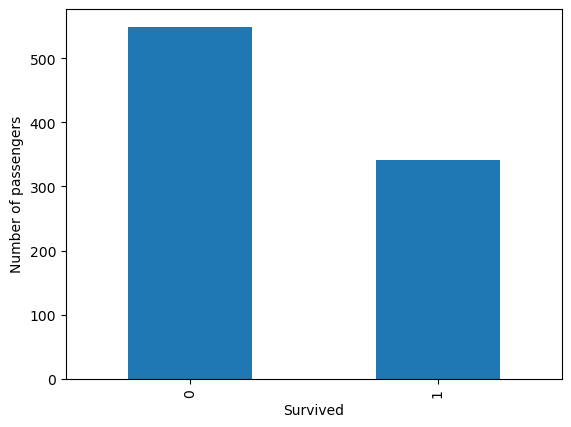

In [18]:
Y.value_counts().plot(kind='bar').set(xlabel='Survived', ylabel='Number of passengers')

[Text(0.5, 0, 'PClass'), Text(0, 0.5, 'Number of passengers')]

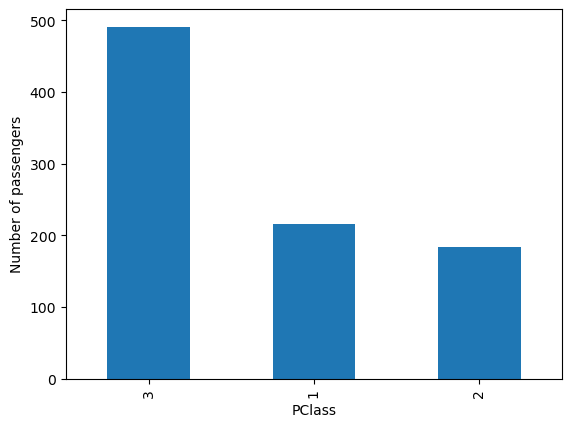

In [19]:
df['Pclass'].value_counts().plot(kind='bar').set(xlabel='PClass', ylabel='Number of passengers')

[Text(0.5, 0, 'Number of siblings/spouse aboard'),
 Text(0, 0.5, 'Number of passengers')]

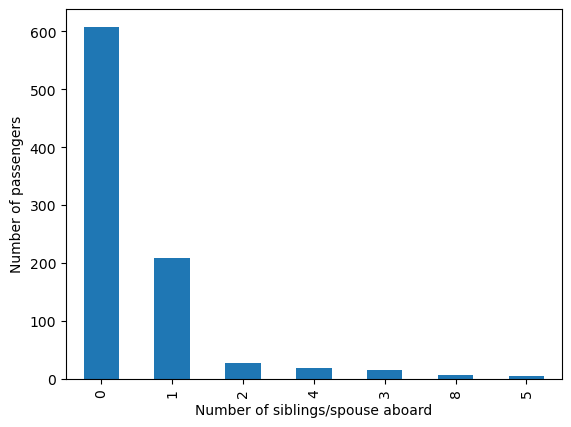

In [20]:
df['SibSp'].value_counts().plot(kind='bar').set(xlabel='Number of siblings/spouse aboard', ylabel='Number of passengers')

[Text(0.5, 0, 'Number of parents/children aboard'),
 Text(0, 0.5, 'Number of passengers')]

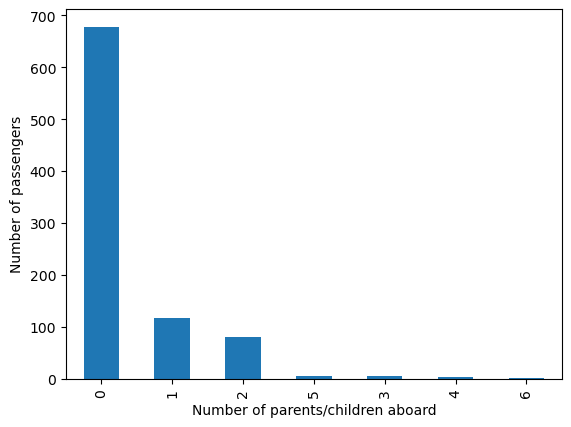

In [21]:
df['Parch'].value_counts().plot(kind='bar').set(xlabel='Number of parents/children aboard', ylabel='Number of passengers')

[Text(0.5, 0, 'Gender partition aboard'), Text(0, 0.5, 'Number of passengers')]

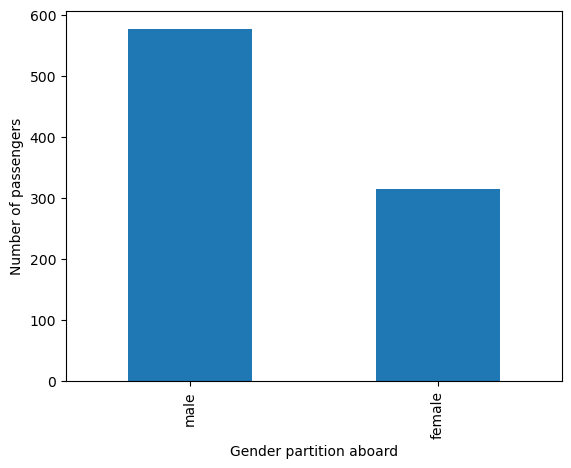

In [22]:
df['Sex'].value_counts().plot(kind='bar').set(xlabel='Gender partition aboard', ylabel='Number of passengers')

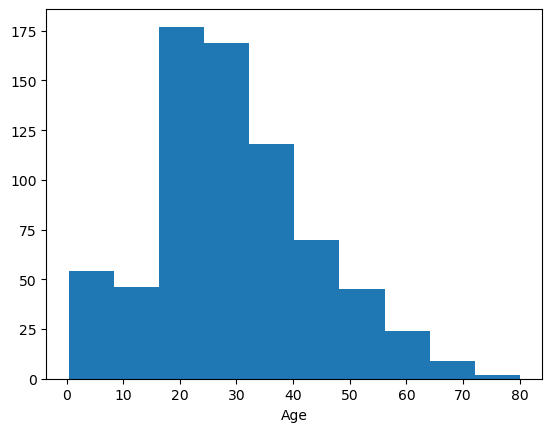

In [23]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.show()

[Text(0.5, 0, 'Started from'), Text(0, 0.5, 'Number of passengers')]

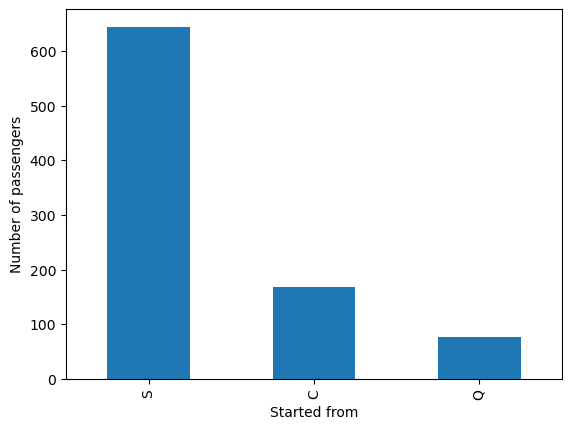

In [24]:
df['Embarked'].value_counts().plot(kind='bar').set(xlabel='Started from', ylabel='Number of passengers')

In [25]:
df.corr()

/tmp/ipykernel_440883/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

/tmp/ipykernel_440883/1411751928.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)


<AxesSubplot:>

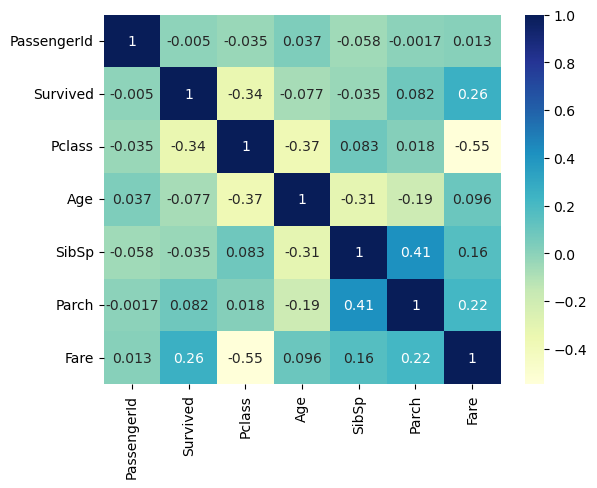

In [26]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

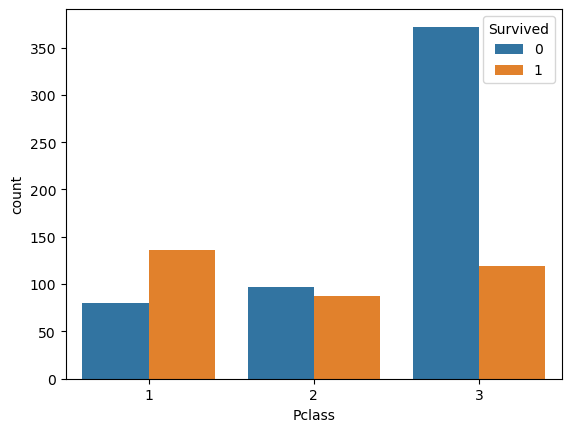

In [27]:
sns.countplot(x=df['Pclass'], hue=df['Survived'], data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

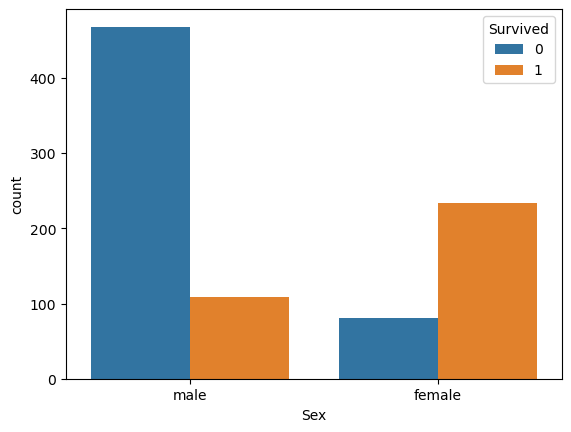

In [28]:
sns.countplot(x=df['Sex'], hue=df['Survived'], data=df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

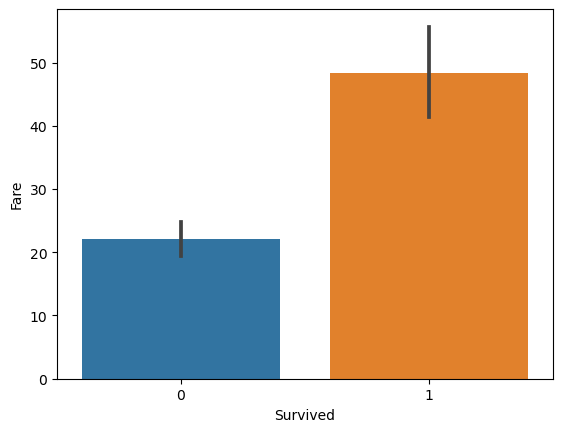

In [29]:
sns.barplot(x=df['Survived'], y=df['Fare'])

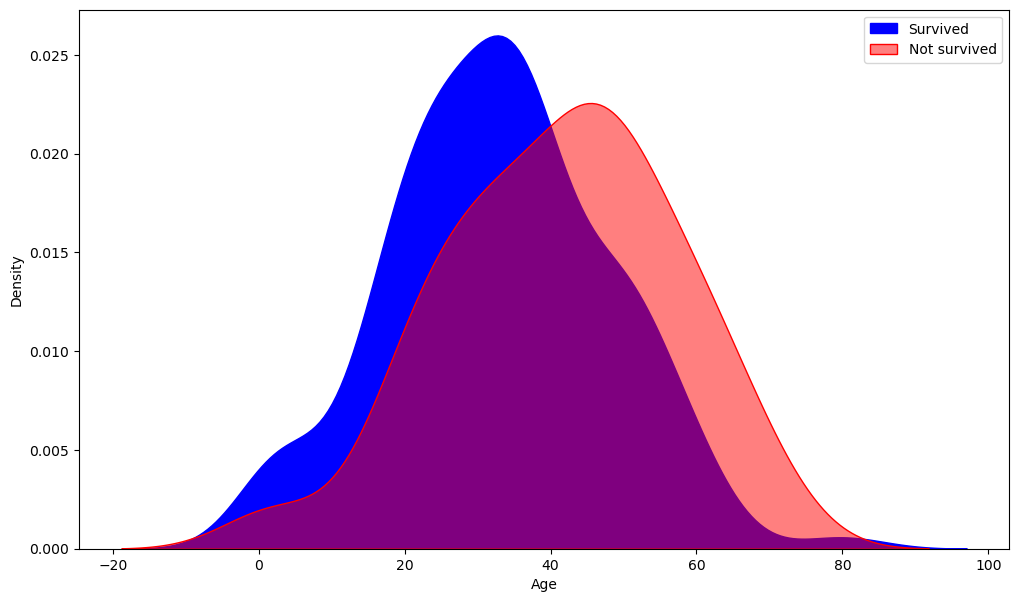

In [30]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df[df['Survived'] == 1].dropna(), x='Age', fill=True, alpha=1, color='blue', label='Survived')
sns.kdeplot(data=df[df['Survived'] == 0].dropna(), x='Age', fill=True, alpha=0.5, color='red', label='Not survived')
plt.legend()
plt.show()

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

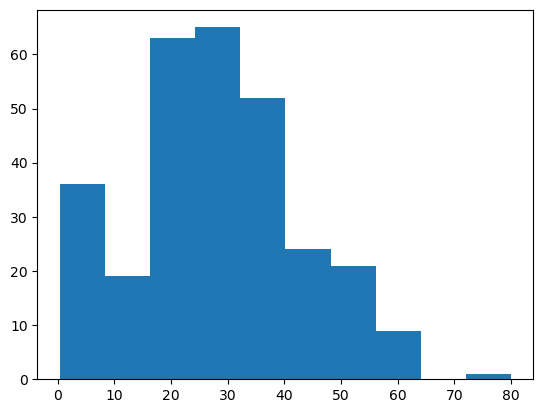

In [31]:
plt.hist(x=df[df['Survived'] == 1]['Age'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

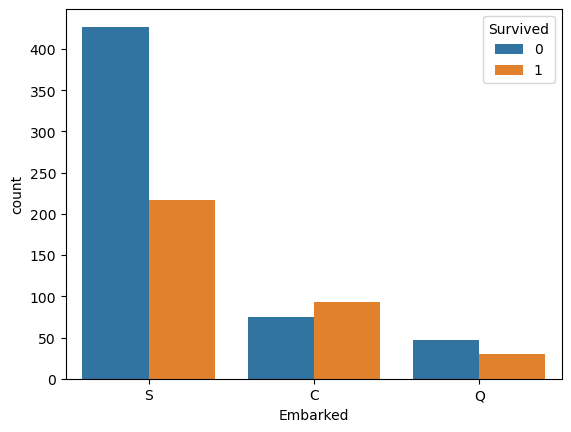

In [32]:
sns.countplot(data=df, x='Embarked', hue='Survived')

<AxesSubplot:>

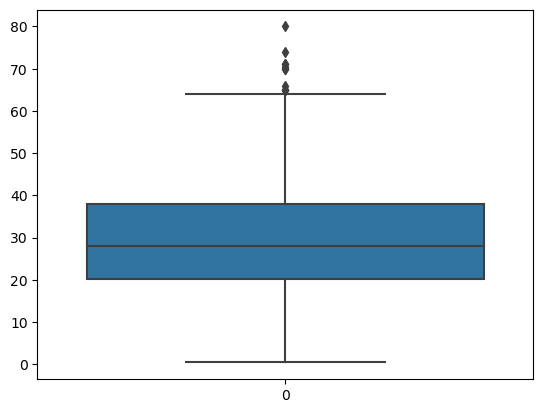

In [33]:
sns.boxplot(df['Age'])

In [34]:
df['Age'].isnull().sum()

177

In [35]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [36]:
df['Embarked'].fillna('S', inplace=True)

In [37]:
df.drop(columns=['Cabin'], inplace=True)

In [38]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Salutations      0
dtype: int64

In [39]:
df_test.drop(columns=['Cabin'], inplace=True)

In [40]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

## Feature Engg

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Salutations  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
df['Embarked']  = df['Embarked'].astype("category")
df['Pclass']    = df['Pclass'].astype("category")
df['Sex']       = df['Sex'].astype("category")
df['Age']       = df['Age'].astype("int")
df['Salutations'] = df['Salutations'].astype("category")

In [43]:
df.head()

PassengerId  Survived Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0      3    male   22      1      0         A/5 21171   
1            2         1      1  female   38      1      0          PC 17599   
2            3         1      3  female   26      0      0  STON/O2. 3101282   
3            4         1      1  female   35      1      0            113803   
4            5         0      3    male   35      0      0            373450   

      Fare Embarked Salutations  
0   7.2500        S          Mr  
1  71.2833        C         Mrs  
2   7.9250        S        Miss  
3  53.1000        S         Mrs  
4   8.0500        S          Mr

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
 10  Salutations  891 non-null    category
dtypes: category(4), float64(1), int64(5), object(1)
memory usage: 53.1+ KB


In [45]:
df.drop(columns=['Ticket'], inplace=True)
df_test.drop(columns=['Ticket'], inplace=True)

In [46]:
df['tmp_family'] = df['SibSp'] + df['Parch']
df_test['tmp_family'] = df_test['SibSp'] + df_test['Parch']

In [47]:
df.drop(columns=['Parch', 'SibSp'], inplace=True)
df_test.drop(columns=['Parch', 'SibSp'], inplace=True)

In [48]:
# Age split
bins= [0,16,30,45,50]
labels = ['Childern','Young Adults','Middle-aged Adults','Old Adults']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

In [49]:
# Grouping Family
bins= [0,1,5,7,11]
labels = ['Alone','Duo','Small','Large']
df['Family'] = pd.cut(df['tmp_family'], bins=bins, labels=labels, right=False)
df_test['Family'] = pd.cut(df_test['tmp_family'], bins=bins, labels=labels, right=False)

In [50]:
df.head()

PassengerId  Survived Pclass     Sex  Age     Fare Embarked Salutations  \
0            1         0      3    male   22   7.2500        S          Mr   
1            2         1      1  female   38  71.2833        C         Mrs   
2            3         1      3  female   26   7.9250        S        Miss   
3            4         1      1  female   35  53.1000        S         Mrs   
4            5         0      3    male   35   8.0500        S          Mr   

   tmp_family            AgeGroup Family  
0           1        Young Adults    Duo  
1           1  Middle-aged Adults    Duo  
2           0        Young Adults  Alone  
3           1  Middle-aged Adults    Duo  
4           0  Middle-aged Adults  Alone

In [51]:
df.columns, df_test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
        'Salutations', 'tmp_family', 'AgeGroup', 'Family'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
        'Salutations', 'tmp_family', 'AgeGroup', 'Family'],
       dtype='object'))

In [52]:
df_final_train = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'Family', 'Salutations'], drop_first=True)
df_final_test = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'Family', 'Salutations'], drop_first=True)
df_final_train.drop(columns=['PassengerId'], inplace=True)
df_final_test.drop(columns=['PassengerId'], inplace=True)

In [53]:
df_final_train.columns, df_final_test.columns

(Index(['Survived', 'Age', 'Fare', 'tmp_family', 'Pclass_2', 'Pclass_3',
        'Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_Young Adults',
        'AgeGroup_Middle-aged Adults', 'AgeGroup_Old Adults', 'Family_Duo',
        'Family_Small', 'Family_Large', 'Salutations_Dr', 'Salutations_Master',
        'Salutations_Miss', 'Salutations_Mr', 'Salutations_Mrs',
        'Salutations_Ms', 'Salutations_Others', 'Salutations_Rev'],
       dtype='object'),
 Index(['Age', 'Fare', 'tmp_family', 'Pclass_2', 'Pclass_3', 'Sex_male',
        'Embarked_Q', 'Embarked_S', 'AgeGroup_Young Adults',
        'AgeGroup_Middle-aged Adults', 'AgeGroup_Old Adults', 'Family_Duo',
        'Family_Small', 'Family_Large', 'Salutations_Dr', 'Salutations_Master',
        'Salutations_Miss', 'Salutations_Mr', 'Salutations_Mrs',
        'Salutations_Ms', 'Salutations_Others', 'Salutations_Rev'],
       dtype='object'))

In [54]:
df_final_train.shape, df_final_test.shape

((891, 23), (418, 22))

In [55]:
df_final_train.drop(columns=['Age', 'tmp_family'], inplace=True)
df_final_test.drop(columns=['Age', 'tmp_family'], inplace=True)

In [56]:
df_final_train.shape, df_final_test.shape

((891, 21), (418, 20))

In [57]:
y = df_final_train['Survived']
X = df_final_train.drop(columns=['Survived'])

## Model building

In [58]:
random_state = 42

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [60]:
np.unique(y_train, return_counts=True), np.unique(y_val, return_counts=True)

((array([0, 1]), array([444, 268])), (array([0, 1]), array([105,  74])))

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(random_state=random_state)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

accuracy_score(y_pred, y_val), f1_score(y_pred, y_val)

/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8044692737430168, 0.761904761904762)

### K nearest Neighbours

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5) # best found via trial-error method
knc.fit(X_train, y_train)

y_pred = knc.predict(X_val)

accuracy_score(y_pred, y_val), f1_score(y_pred, y_val)

(0.7821229050279329, 0.7234042553191488)

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_state)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)

accuracy_score(y_pred, y_val), f1_score(y_pred, y_val)

(0.8044692737430168, 0.7651006711409396)

## Submission

In [64]:
pred = lr.predict(df_final_test)

In [65]:
submission = pd.DataFrame({
    "PassengerId":df_test["PassengerId"],
    "Survived":pred
})

In [66]:
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [67]:
submission.to_csv('./submission_lr.csv', index=False)

### All ML Models

In [68]:
from pandas_profiling import ProfileReport

#Leveraging pandas profiling to investigate data
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
cat = df.select_dtypes('category').columns

for item in [df[item].value_counts(normalize=True,sort=True)*100 for item in cat]:
    print(item)
    print("")

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

male      64.758698
female    35.241302
Name: Sex, dtype: float64

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

Mr        58.136925
Miss      20.426487
Mrs       14.029181
Master     4.489338
Others     1.122334
Dr         0.785634
Rev        0.673401
Col        0.224467
Ms         0.112233
Name: Salutations, dtype: float64

Young Adults          58.506732
Middle-aged Adults    26.315789
Childern              10.159119
Old Adults             5.018360
Name: AgeGroup, dtype: float64

Alone    60.269360
Duo      34.455668
Small     3.815937
Large     1.459035
Name: Family, dtype: float64



In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_score, LeaveOneOut, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

In [96]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X_rescaled=pd.DataFrame(X_std)

In [97]:
X_train_std = scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_std)

X_val_std = scaler.transform(X_val)
X_val_scaled=pd.DataFrame(X_val_std)

In [120]:
X_test_std = scaler.transform(df_final_test)
X_test_scaled = pd.DataFrame(X_test_std)

In [98]:
class_models = []
class_models.append(('LogisticRegression', LogisticRegression()))
class_models.append(('KNearestNeighbours', KNeighborsClassifier(n_neighbors= 3)))
class_models.append(('GaussianNB', GaussianNB()))
class_models.append(('DecisionTrees', DecisionTreeClassifier()))
class_models.append(('RandomForest', RandomForestClassifier()))
class_models.append(('AdaBoost', AdaBoostClassifier()))
class_models.append(('Bagging Classifier', BaggingClassifier()))
class_models.append(('GradientBoosting', GradientBoostingClassifier()))
class_models.append(('XGB', XGBClassifier(verbosity=0)))
class_models.append(('SVC', SVC(kernel = 'rbf',probability=True)))

In [99]:
col = ['Algorithm', 'Model', 'Accuracy_Train', 'Accuracy_Test', 'Precision_Test', 'True_Positive Rate (Recall)','F1_Score_Test',
       'ROC_AUC_SCORE(Avg)']
model_results = pd.DataFrame(columns=col)

In [100]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    roc_auc_tot = 0
    k = 0
    for per_class in unique_class:
        k+=1
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]
        
        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        
        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
        roc_auc_tot = roc_auc_tot + roc_auc
    #Averaging for all the classes together
    roc_auc_avg = roc_auc_tot/k
    print('ROC-AUC Score (Avg) for Test set :', roc_auc_avg)
    print('\n')
    print('Count of Classes:', k)
    
    return roc_auc_dict, roc_auc_avg

In [101]:
def print_scores(name, model, y_train, y_pred_train, y_val, y_pred_val, i):
    print("\n" + "\033[1m" + "\nModel: ",name)
    print("\033[0m")
    acc_score_train = accuracy_score(y_train, y_pred_train)
    acc_score_val = accuracy_score(y_val, y_pred_val)
    print("Training Set accuracy: ",acc_score_train)
    print("val Set accuracy: ",acc_score_val)
    pre_score_train = precision_score(y_train, y_pred_train,average='weighted')
    pre_score_val = precision_score(y_val, y_pred_val, average='weighted')
    print("val Set precision: ",pre_score_val)
    rec_score_train = recall_score(y_train, y_pred_train, average='weighted')
    rec_score_val = recall_score(y_val, y_pred_val, average='weighted')
    print("val Set recall: ",rec_score_val)
    f_score_train = f1_score(y_train, y_pred_train, average='weighted')
    f_score_val = f1_score(y_val, y_pred_val, average='weighted')
    print("val Set f1_score: ",f_score_val)
    
    lr_roc_auc_multiclass, roc_auc_avg = roc_auc_score_multiclass(y_val, y_pred_val)
    print("val Set ROC_AUC_Score(Avg): ",roc_auc_avg)
    print('\n')
    print(lr_roc_auc_multiclass)
    
    model_results.loc[i] = [name, model,
                            round(acc_score_train*100, 2),
                            round(acc_score_val*100, 2),
                            round(pre_score_val*100, 2),
                            round(rec_score_val*100, 2),
                            round(f_score_val*100, 2),
                            round(roc_auc_avg*100, 2)]
    return

Classification Report using base LogisticRegression for Training dataset
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       444
           1       0.79      0.73      0.76       268

    accuracy                           0.82       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712

Classification Report using base LogisticRegression for Val dataset
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



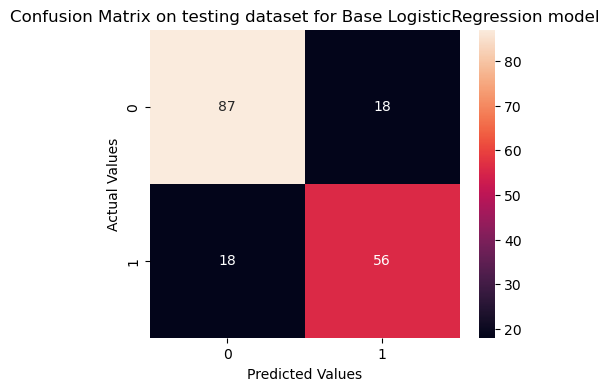



Model:  LogisticRegression(Base Model)

Training Set accuracy:  0.824438202247191
val Set accuracy:  0.7988826815642458
val Set precision:  0.7988826815642458
val Set recall:  0.7988826815642458
val Set f1_score:  0.7988826815642458
ROC-AUC Score (Avg) for Test set : 0.7926640926640928


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7926640926640928


{0: 0.7926640926640929, 1: 0.7926640926640927}
---
Classification Report using base KNearestNeighbours for Training dataset
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       444
           1       0.84      0.76      0.80       268

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.84       712
weighted avg       0.86      0.86      0.86       712

Classification Report using base KNearestNeighbours for Val dataset
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           

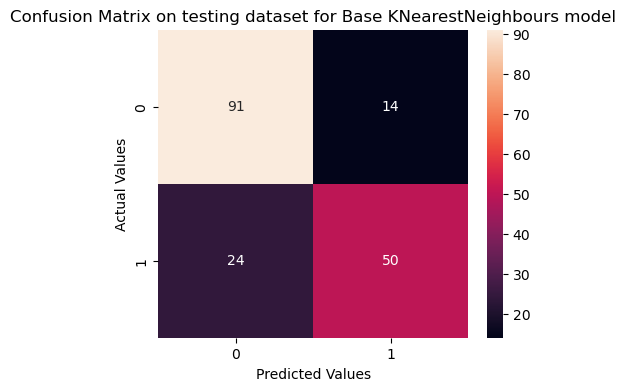



Model:  KNearestNeighbours(Base Model)

Training Set accuracy:  0.8567415730337079
val Set accuracy:  0.7877094972067039
val Set precision:  0.7871478017974253
val Set recall:  0.7877094972067039
val Set f1_score:  0.7848425964772819
ROC-AUC Score (Avg) for Test set : 0.7711711711711712


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7711711711711712


{0: 0.7711711711711712, 1: 0.7711711711711712}
---
Classification Report using base GaussianNB for Training dataset
              precision    recall  f1-score   support

           0       0.94      0.07      0.13       444
           1       0.39      0.99      0.56       268

    accuracy                           0.42       712
   macro avg       0.66      0.53      0.34       712
weighted avg       0.73      0.42      0.29       712

Classification Report using base GaussianNB for Val dataset
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       105
           1       0.42   

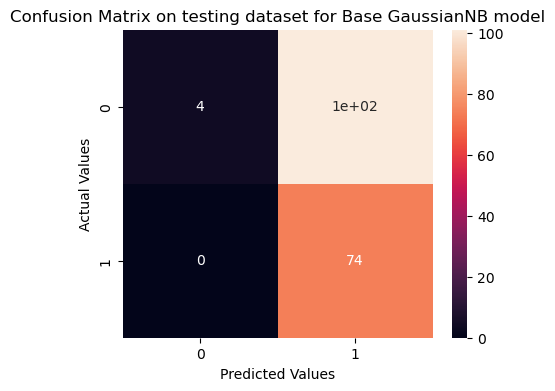



Model:  GaussianNB(Base Model)

Training Set accuracy:  0.4157303370786517
val Set accuracy:  0.43575418994413406
val Set precision:  0.7614046288906625
val Set recall:  0.43575418994413406
val Set f1_score:  0.28877294838726547
ROC-AUC Score (Avg) for Test set : 0.519047619047619


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.519047619047619


{0: 0.5190476190476191, 1: 0.519047619047619}
---
Classification Report using base DecisionTrees for Training dataset
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       444
           1       0.97      0.91      0.94       268

    accuracy                           0.95       712
   macro avg       0.96      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712

Classification Report using base DecisionTrees for Val dataset
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74     

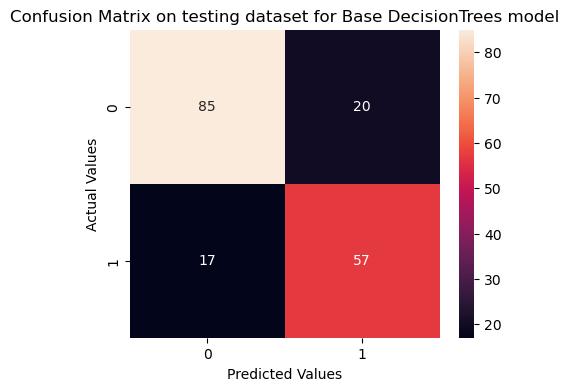



Model:  DecisionTrees(Base Model)

Training Set accuracy:  0.9536516853932584
val Set accuracy:  0.7932960893854749
val Set precision:  0.7948559820068201
val Set recall:  0.7932960893854749
val Set f1_score:  0.7938515850661744
ROC-AUC Score (Avg) for Test set : 0.78989703989704


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.78989703989704


{0: 0.78989703989704, 1: 0.7898970398970399}
---
Classification Report using base RandomForest for Training dataset
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       444
           1       0.96      0.92      0.94       268

    accuracy                           0.95       712
   macro avg       0.95      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712

Classification Report using base RandomForest for Val dataset
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       105
           1       0.77      0.82

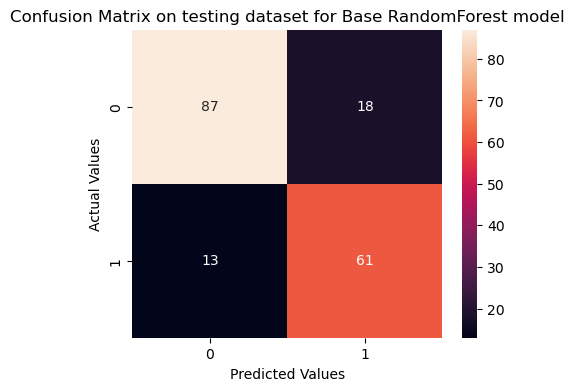



Model:  RandomForest(Base Model)

Training Set accuracy:  0.9536516853932584
val Set accuracy:  0.8268156424581006
val Set precision:  0.8295488296442967
val Set recall:  0.8268156424581006
val Set f1_score:  0.82753344786159
ROC-AUC Score (Avg) for Test set : 0.8264478764478765


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8264478764478765


{0: 0.8264478764478767, 1: 0.8264478764478764}
---
Classification Report using base AdaBoost for Training dataset
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       444
           1       0.82      0.76      0.79       268

    accuracy                           0.85       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.85      0.85      0.85       712

Classification Report using base AdaBoost for Val dataset
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.75      0.77     

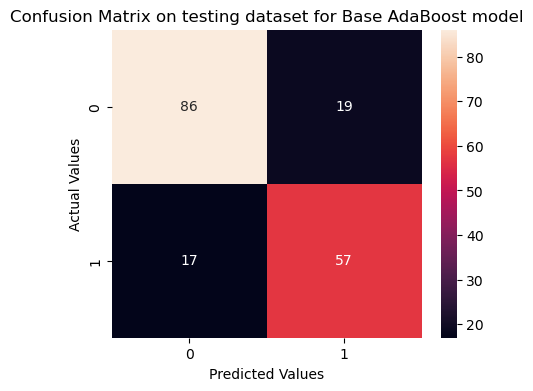



Model:  AdaBoost(Base Model)

Training Set accuracy:  0.8469101123595506
val Set accuracy:  0.7988826815642458
val Set precision:  0.7998318598470466
val Set recall:  0.7988826815642458
val Set f1_score:  0.7992565535023637
ROC-AUC Score (Avg) for Test set : 0.7946589446589445


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7946589446589445


{0: 0.7946589446589446, 1: 0.7946589446589445}
---
Classification Report using base Bagging Classifier for Training dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       444
           1       0.95      0.89      0.92       268

    accuracy                           0.94       712
   macro avg       0.94      0.93      0.94       712
weighted avg       0.94      0.94      0.94       712

Classification Report using base Bagging Classifier for Val dataset
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0

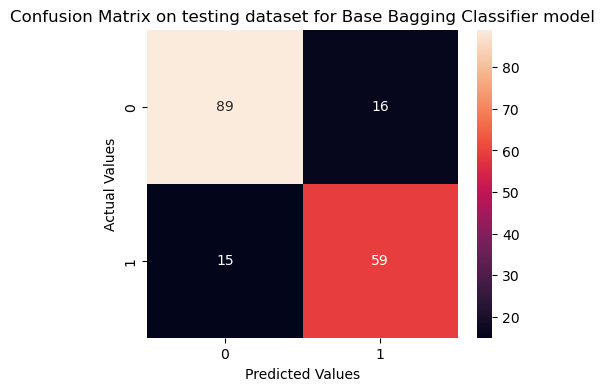



Model:  Bagging Classifier(Base Model)

Training Set accuracy:  0.9410112359550562
val Set accuracy:  0.8268156424581006
val Set precision:  0.827201690302249
val Set recall:  0.8268156424581006
val Set f1_score:  0.8269824813754845
ROC-AUC Score (Avg) for Test set : 0.8224581724581724


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8224581724581724


{0: 0.8224581724581724, 1: 0.8224581724581724}
---
Classification Report using base GradientBoosting for Training dataset
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       444
           1       0.94      0.78      0.85       268

    accuracy                           0.90       712
   macro avg       0.91      0.87      0.88       712
weighted avg       0.90      0.90      0.89       712

Classification Report using base GradientBoosting for Val dataset
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1   

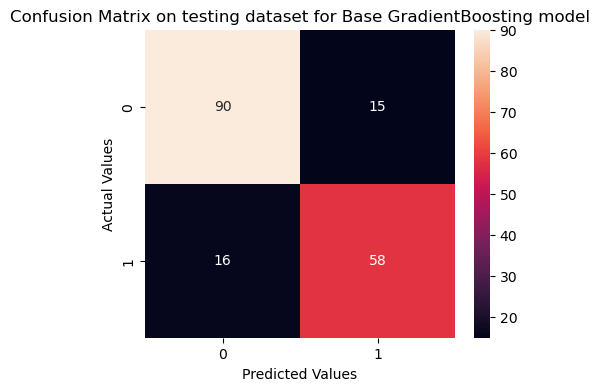



Model:  GradientBoosting(Base Model)

Training Set accuracy:  0.8960674157303371
val Set accuracy:  0.8268156424581006
val Set precision:  0.8265109717551488
val Set recall:  0.8268156424581006
val Set f1_score:  0.8266369694903299
ROC-AUC Score (Avg) for Test set : 0.8204633204633205


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8204633204633205


{0: 0.8204633204633205, 1: 0.8204633204633205}
---
Classification Report using base XGB for Training dataset
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       444
           1       0.97      0.86      0.91       268

    accuracy                           0.94       712
   macro avg       0.95      0.92      0.93       712
weighted avg       0.94      0.94      0.94       712

Classification Report using base XGB for Val dataset
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.8

/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


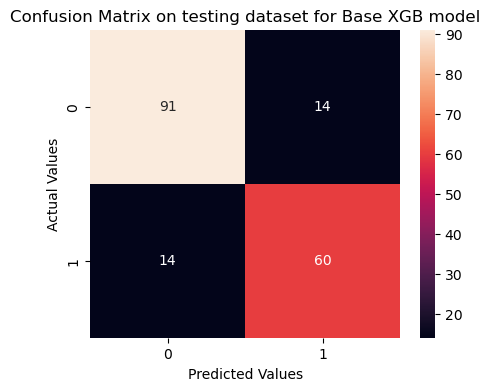



Model:  XGB(Base Model)

Training Set accuracy:  0.9367977528089888
val Set accuracy:  0.8435754189944135
val Set precision:  0.8435754189944135
val Set recall:  0.8435754189944135
val Set f1_score:  0.8435754189944135
ROC-AUC Score (Avg) for Test set : 0.8387387387387388


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8387387387387388


{0: 0.8387387387387387, 1: 0.8387387387387388}
---
Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       444
           1       0.88      0.69      0.77       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

Classification Report using base SVC for Val dataset
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74



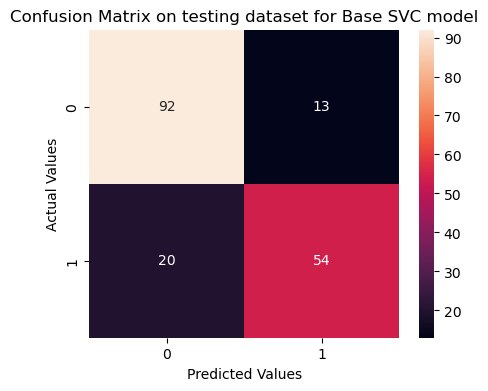



Model:  SVC(Base Model)

Training Set accuracy:  0.8469101123595506
val Set accuracy:  0.8156424581005587
val Set precision:  0.8150379387976319
val Set recall:  0.8156424581005587
val Set f1_score:  0.8140397158008151
ROC-AUC Score (Avg) for Test set : 0.802960102960103


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.802960102960103


{0: 0.802960102960103, 1: 0.802960102960103}
---


In [102]:
i = 0
for modelname, model in class_models:
    mdl=model.fit(X_train_scaled,y_train)
    pred_train=mdl.predict(X_train_scaled)
    pred_val=mdl.predict(X_val_scaled)
    print(f"Classification Report using base {modelname} for Training dataset")
    print(classification_report(y_train, pred_train))
    print(f"Classification Report using base {modelname} for Val dataset")
    print(classification_report(y_val, pred_val))
    
    cm = metrics.confusion_matrix(y_val, pred_val)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print_scores(modelname + '(Base Model)', model, y_train, pred_train, y_val, pred_val, i)
    i += 1
    print("---")

In [103]:
model_results

Algorithm  \
0  LogisticRegression(Base Model)   
1  KNearestNeighbours(Base Model)   
2          GaussianNB(Base Model)   
3       DecisionTrees(Base Model)   
4        RandomForest(Base Model)   
5            AdaBoost(Base Model)   
6  Bagging Classifier(Base Model)   
7    GradientBoosting(Base Model)   
8                 XGB(Base Model)   
9                 SVC(Base Model)   

                                               Model  Accuracy_Train  \
0                               LogisticRegression()           82.44   
1                KNeighborsClassifier(n_neighbors=3)           85.67   
2                                       GaussianNB()           41.57   
3                           DecisionTreeClassifier()           95.37   
4  (DecisionTreeClassifier(max_features='sqrt', r...           95.37   
5  (DecisionTreeClassifier(max_depth=1, random_st...           84.69   
6  (DecisionTreeClassifier(random_state=466418842...           94.10   
7  ([DecisionTreeRegressor(criterion='friedman_ms...           89.61   
8  XGBClassifier(base_score=0.5, booster='gbtree'...           93.68   
9                              SVC(probability=True)           84.69   

   Accuracy_Test  Precision_Test  True_Positive Rate (Recall)  F1_Score_Test  \
0          79.89           79.89                        79.89          79.89   
1          78.77           78.71                        78.77          78.48   
2          43.58           76.14                        43.58          28.88   
3          79.33           79.49                        79.33          79.39   
4          82.68           82.95                        82.68          82.75   
5          79.89           79.98                        79.89          79.93   
6          82.68           82.72                        82.68          82.70   
7          82.68           82.65                        82.68          82.66   
8          84.36           84.36                        84.36          84.36   
9          81.56           81.50                        81.56          81.40   

   ROC_AUC_SCORE(Avg)  
0               79.27  
1               77.12  
2               51.90  
3               78.99  
4               82.64  
5               79.47  
6               82.25  
7               82.05  
8               83.87  
9               80.30

In [104]:
# Set grid/randomized search params
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

param_grids = [] # contains range of params for all above models in respective indices

param_grids.append(({'C': [0.001,0.01,0.1,1,10,100],
                     'penalty':['l1','l2']}))                               # logistic regression

param_grids.append(({'n_neighbors' : range(3, 16, 2), 
                    'weights' : ['distance'], 
                    'metric' : ['euclidean', 'manhattan', 'minkowski']}))   # k means clustering

param_grids.append(({'var_smoothing': np.logspace(0,-9, num=100)}))         # Gaussian Naive Bayes

param_grids.append(({'max_depth':np.arange(10,50,10)}))                     # Decision Trees

param_grids.append(({'max_depth': param_range, 
                   'min_samples_split': param_range[1:], 
                   'min_samples_leaf': param_range, 
                   'criterion':['gini','entropy']}))                        # Random Forests

param_grids.append(({'n_estimators':np.arange(50,100,10),
                   'learning_rate':[0.1,0.5]}))                             # AdaBoost

param_grids.append(({'n_estimators':[10, 100, 1000]}))                      # Bagging Classifier

param_grids.append(({'n_estimators':[5,50,100,1000],
                    'max_depth':[1,3,5,7,9], 
                    'learning_rate':[0.01,0.1,1]}))                         # Gradient Boosting

param_grids.append(({'learning_rate': [0.05, 0.10, 0.15], 
                    'max_depth': [ 3, 4, 5, 6, 8],
                    'min_child_weight' : [ 1, 3, 5],
                    'gamma' : [ 0.0, 0.1, 0.2 , 0.3], 
                    'colsample_bytree' : [ 0.3, 0.5 ]}))                    # XGB

param_grids.append(({'kernel': ['poly', 'rbf', 'sigmoid'], 
                    'C': [10, 1.0, 0.1, 0.01],
                    'gamma': ['scale']}))                                   # SVC

Best: 0.810407 using {'penalty': 'l2', 'C': 0.1}


The best Hyperparameters as per RandomizedSearchCV for LogisticRegression model are :
{'penalty': 'l2', 'C': 0.1}



Classification Report on training dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       444
           1       0.79      0.74      0.76       268

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.83      0.82       712


Classification Report on Val dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81    

/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sk

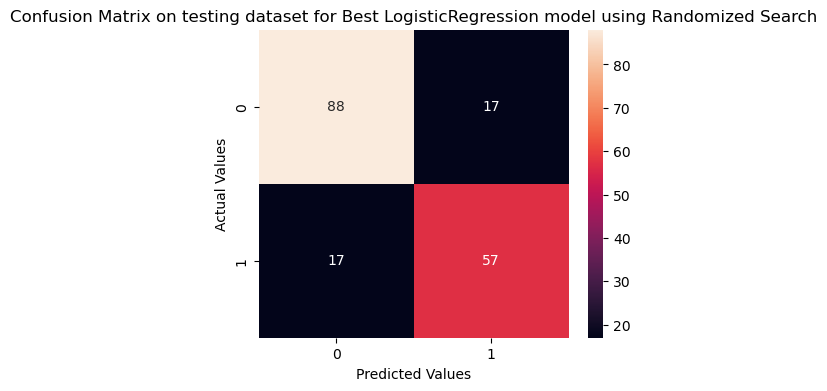



Model:  LogisticRegression(Randomized Search)

Training Set accuracy:  0.8258426966292135
val Set accuracy:  0.8100558659217877
val Set precision:  0.8100558659217877
val Set recall:  0.8100558659217877
val Set f1_score:  0.8100558659217877
ROC-AUC Score (Avg) for Test set : 0.8041827541827542


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8041827541827542


{0: 0.8041827541827542, 1: 0.8041827541827542}
Best: 0.777543 using {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}


The best Hyperparameters as per RandomizedSearchCV for KNearestNeighbours model are :
{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}



Classification Report on training dataset for Best KNearestNeighbours model using Randomized Search
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       444
           1       0.97      0.91      0.94       268

    accuracy                           0.95       712
   macro avg       0.96 

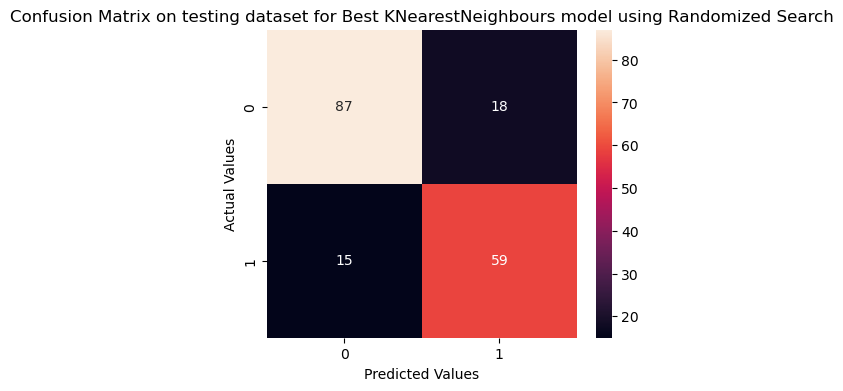



Model:  KNearestNeighbours(Randomized Search)

Training Set accuracy:  0.9536516853932584
val Set accuracy:  0.8156424581005587
val Set precision:  0.8170956549201702
val Set recall:  0.8156424581005587
val Set f1_score:  0.8161379001941554
ROC-AUC Score (Avg) for Test set : 0.8129343629343628


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8129343629343628


{0: 0.8129343629343629, 1: 0.8129343629343628}
Best: 0.784194 using {'var_smoothing': 0.2848035868435802}


The best Hyperparameters as per RandomizedSearchCV for GaussianNB model are :
{'var_smoothing': 0.2848035868435802}



Classification Report on training dataset for Best GaussianNB model using Randomized Search
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       444
           1       0.71      0.72      0.72       268

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.79      0.79      0

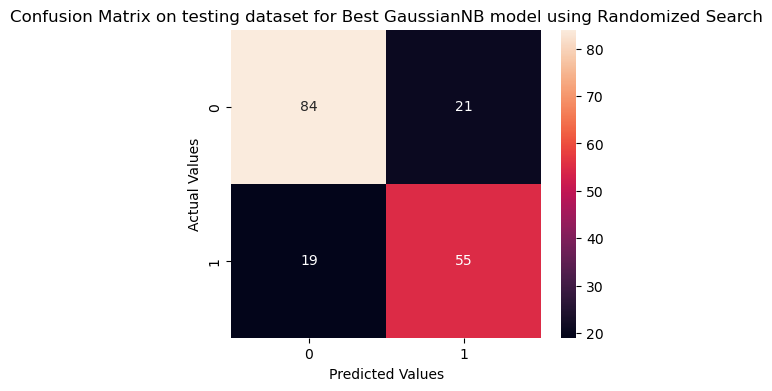



Model:  GaussianNB(Randomized Search)

Training Set accuracy:  0.7851123595505618
val Set accuracy:  0.776536312849162
val Set precision:  0.7775625672631977
val Set recall:  0.776536312849162
val Set f1_score:  0.7769517261137374
ROC-AUC Score (Avg) for Test set : 0.7716216216216216


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7716216216216216


{0: 0.7716216216216216, 1: 0.7716216216216216}
Best: 0.815571 using {'max_depth': 10}


The best Hyperparameters as per RandomizedSearchCV for DecisionTrees model are :
{'max_depth': 10}



Classification Report on training dataset for Best DecisionTrees model using Randomized Search
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       444
           1       0.97      0.75      0.84       268

    accuracy                           0.90       712
   macro avg       0.92      0.87      0.88       712
weighted avg       0.90      0.90      0.89       712


Classification Report on Val

/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


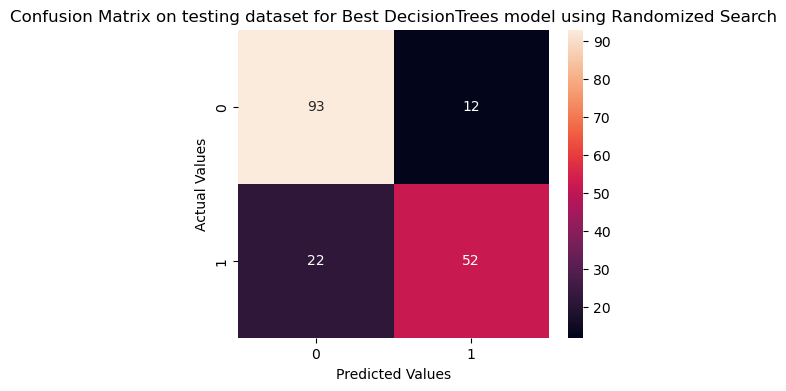



Model:  DecisionTrees(Randomized Search)

Training Set accuracy:  0.8960674157303371
val Set accuracy:  0.8100558659217877
val Set precision:  0.8102683993198931
val Set recall:  0.8100558659217877
val Set f1_score:  0.8074907442165153
ROC-AUC Score (Avg) for Test set : 0.7942084942084942


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7942084942084942


{0: 0.7942084942084942, 1: 0.7942084942084942}
Best: 0.823526 using {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'}


The best Hyperparameters as per RandomizedSearchCV for RandomForest model are :
{'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'}



Classification Report on training dataset for Best RandomForest model using Randomized Search
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       444
           1       0.91      0.72      0.80       268

    accuracy                           0.87       712
 

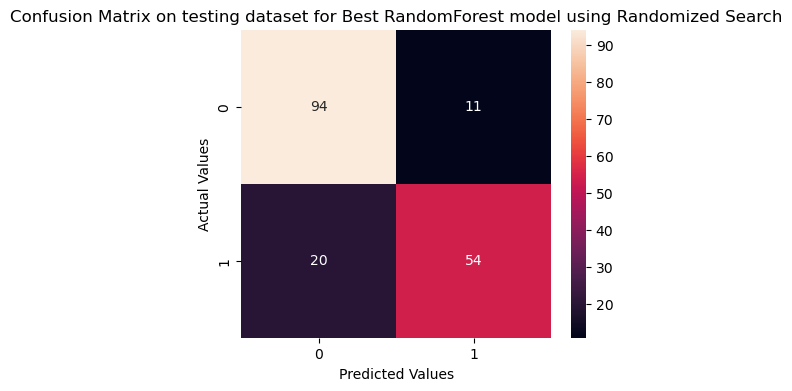



Model:  RandomForest(Randomized Search)

Training Set accuracy:  0.8679775280898876
val Set accuracy:  0.8268156424581006
val Set precision:  0.8271277678510845
val Set recall:  0.8268156424581006
val Set f1_score:  0.8247675373132274
ROC-AUC Score (Avg) for Test set : 0.8124839124839125


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8124839124839125


{0: 0.8124839124839125, 1: 0.8124839124839125}
Best: 0.811300 using {'n_estimators': 90, 'learning_rate': 0.1}


The best Hyperparameters as per RandomizedSearchCV for AdaBoost model are :
{'n_estimators': 90, 'learning_rate': 0.1}



Classification Report on training dataset for Best AdaBoost model using Randomized Search
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       444
           1       0.79      0.71      0.75       268

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0

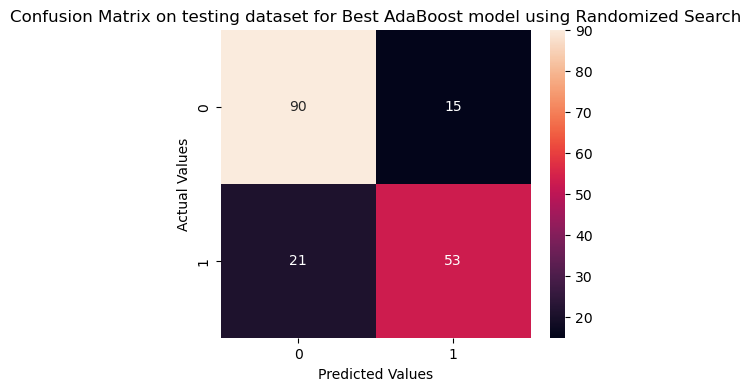



Model:  AdaBoost(Randomized Search)

Training Set accuracy:  0.8188202247191011
val Set accuracy:  0.7988826815642458
val Set precision:  0.7978301995719018
val Set recall:  0.7988826815642458
val Set f1_score:  0.7974270202218899
ROC-AUC Score (Avg) for Test set : 0.7866795366795367


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7866795366795367


{0: 0.7866795366795367, 1: 0.7866795366795367}


/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best: 0.817397 using {'n_estimators': 1000}


The best Hyperparameters as per RandomizedSearchCV for Bagging Classifier model are :
{'n_estimators': 1000}



Classification Report on training dataset for Best Bagging Classifier model using Randomized Search
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       444
           1       0.95      0.92      0.94       268

    accuracy                           0.95       712
   macro avg       0.95      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712


Classification Report on Val dataset for Best Bagging Classifier model using Randomized Search
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83    

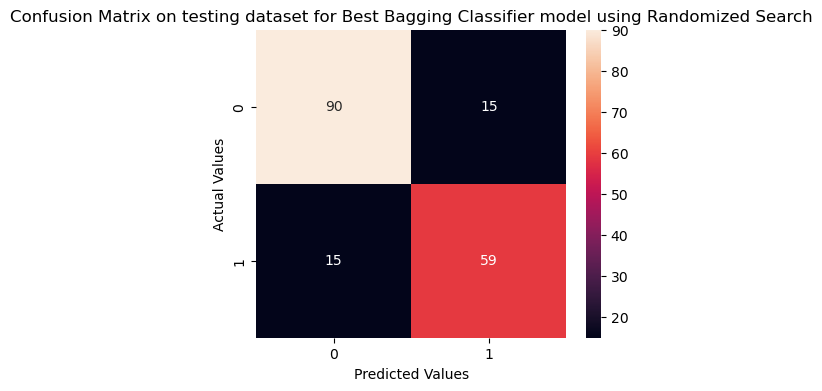



Model:  Bagging Classifier(Randomized Search)

Training Set accuracy:  0.9536516853932584
val Set accuracy:  0.8324022346368715
val Set precision:  0.8324022346368715
val Set recall:  0.8324022346368715
val Set f1_score:  0.8324022346368715
ROC-AUC Score (Avg) for Test set : 0.8272200772200773


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.8272200772200773


{0: 0.8272200772200773, 1: 0.8272200772200773}
Best: 0.825809 using {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}


The best Hyperparameters as per RandomizedSearchCV for GradientBoosting model are :
{'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}



Classification Report on training dataset for Best GradientBoosting model using Randomized Search
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.93      0.77      0.84       268

    accuracy                           0.89       712
   macro avg       0.90      0.87 

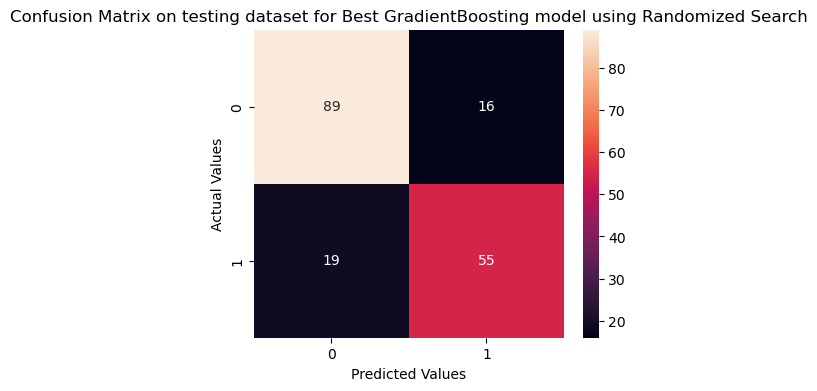



Model:  GradientBoosting(Randomized Search)

Training Set accuracy:  0.8918539325842697
val Set accuracy:  0.8044692737430168
val Set precision:  0.8036409018980425
val Set recall:  0.8044692737430168
val Set f1_score:  0.8038235190375541
ROC-AUC Score (Avg) for Test set : 0.7954311454311453


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7954311454311453


{0: 0.7954311454311455, 1: 0.7954311454311453}


/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/ba13/miniconda3/envs/conda-tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

Best: 0.830034 using {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}


The best Hyperparameters as per RandomizedSearchCV for XGB model are :
{'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}



Classification Report on training dataset for Best XGB model using Randomized Search
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.92      0.78      0.84       268

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712


Classification Report on Val dataset for Best XGB model using Randomized Search
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.8

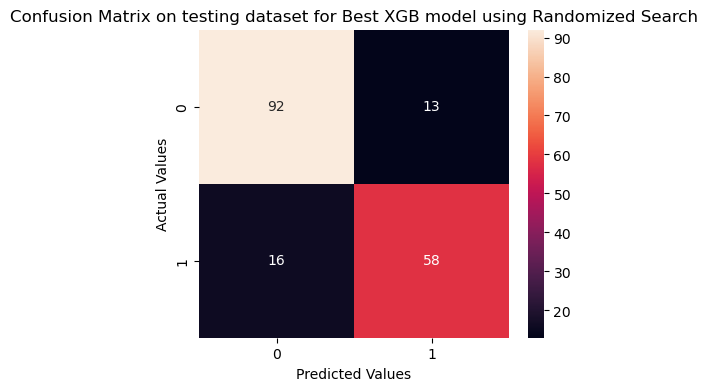



Model:  XGB(Randomized Search)

Training Set accuracy:  0.8904494382022472
val Set accuracy:  0.8379888268156425
val Set precision:  0.8374030651943941
val Set recall:  0.8379888268156425
val Set f1_score:  0.8374537729168307
ROC-AUC Score (Avg) for Test set : 0.82998712998713


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.82998712998713


{0: 0.82998712998713, 1: 0.82998712998713}
Best: 0.814606 using {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}


The best Hyperparameters as per RandomizedSearchCV for SVC model are :
{'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}



Classification Report on training dataset for Best SVC model using Randomized Search
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       444
           1       0.89      0.66      0.76       268

    accuracy                           0.84       712
   macro avg       0.86      0.81      0.82       712
weighted avg       0.85      0.84      0.84       712


Cla

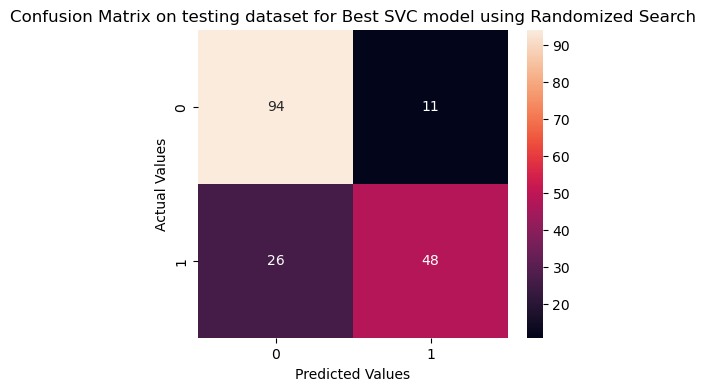



Model:  SVC(Randomized Search)

Training Set accuracy:  0.8426966292134831
val Set accuracy:  0.7932960893854749
val Set precision:  0.7958289934665278
val Set recall:  0.7932960893854749
val Set f1_score:  0.7885299841783228
ROC-AUC Score (Avg) for Test set : 0.7719433719433719


Count of Classes: 2
val Set ROC_AUC_Score(Avg):  0.7719433719433719


{0: 0.7719433719433719, 1: 0.7719433719433719}


In [105]:
# Hypertuning (Randomized Search) Different Models + Fit/Predict

j = 0
for modelname, model in class_models:
    # mdl =OneVsRestClassifier(model)
    mdl = model
    rs = RandomizedSearchCV(mdl,
                            param_grids[j],
                            n_jobs=-1, 
                            cv=cv,
                            scoring='accuracy',
                            refit=True)
    # rand_search = RandomizedSearchCV(model, grid, n_iter=500, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
    rs_mdl=rs.fit(X_train_scaled,y_train)
    # summarize results
    print("Best: %f using %s" % (rs_mdl.best_score_, rs_mdl.best_params_))
    print('\n')
    print(f"The best Hyperparameters as per RandomizedSearchCV for {modelname} model are :")
    print(rs_mdl.best_params_)
    print('\n')
    
    predict_train_rs = rs_mdl.predict(X_train_scaled)
    
    predict_val_rs = rs_mdl.predict(X_val_scaled)
    
    print(f"\nClassification Report on training dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_train, predict_train_rs))
    
    print(f"\nClassification Report on Val dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_val, predict_val_rs))
    
    cm = metrics.confusion_matrix(y_val, predict_val_rs)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Best {modelname} model using Randomized Search')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
 
    name = modelname + '(Randomized Search)'
    print_scores(name, rs_mdl, y_train, predict_train_rs, y_val, predict_val_rs, i)
    i += 1
    j += 1

In [106]:
model_results

Algorithm  \
0          LogisticRegression(Base Model)   
1          KNearestNeighbours(Base Model)   
2                  GaussianNB(Base Model)   
3               DecisionTrees(Base Model)   
4                RandomForest(Base Model)   
5                    AdaBoost(Base Model)   
6          Bagging Classifier(Base Model)   
7            GradientBoosting(Base Model)   
8                         XGB(Base Model)   
9                         SVC(Base Model)   
10  LogisticRegression(Randomized Search)   
11  KNearestNeighbours(Randomized Search)   
12          GaussianNB(Randomized Search)   
13       DecisionTrees(Randomized Search)   
14        RandomForest(Randomized Search)   
15            AdaBoost(Randomized Search)   
16  Bagging Classifier(Randomized Search)   
17    GradientBoosting(Randomized Search)   
18                 XGB(Randomized Search)   
19                 SVC(Randomized Search)   

                                                Model  Accuracy_Train  \
0                                LogisticRegression()           82.44   
1                 KNeighborsClassifier(n_neighbors=3)           85.67   
2                                        GaussianNB()           41.57   
3                            DecisionTreeClassifier()           95.37   
4   (DecisionTreeClassifier(max_features='sqrt', r...           95.37   
5   (DecisionTreeClassifier(max_depth=1, random_st...           84.69   
6   (DecisionTreeClassifier(random_state=466418842...           94.10   
7   ([DecisionTreeRegressor(criterion='friedman_ms...           89.61   
8   XGBClassifier(base_score=0.5, booster='gbtree'...           93.68   
9                               SVC(probability=True)           84.69   
10  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           82.58   
11  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           95.37   
12  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           78.51   
13  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           89.61   
14  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           86.80   
15  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           81.88   
16  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           95.37   
17  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           89.19   
18  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           89.04   
19  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           84.27   

    Accuracy_Test  Precision_Test  True_Positive Rate (Recall)  F1_Score_Test  \
0           79.89           79.89                        79.89          79.89   
1           78.77           78.71                        78.77          78.48   
2           43.58           76.14                        43.58          28.88   
3           79.33           79.49                        79.33          79.39   
4           82.68           82.95                        82.68          82.75   
5           79.89           79.98                        79.89          79.93   
6           82.68           82.72                        82.68          82.70   
7           82.68           82.65                        82.68          82.66   
8           84.36           84.36                        84.36          84.36   
9           81.56           81.50                        81.56          81.40   
10          81.01           81.01                        81.01          81.01   
11          81.56           81.71                        81.56          81.61   
12          77.65           77.76                        77.65          77.70   
13          81.01           81.03                        81.01          80.75   
14          82.68           82.71                        82.68          82.48   
15          79.89           79.78                        79.89          79.74   
16          83.24           83.24                        83.24          83.24   
17          80.45           80.36                        80.45          80.38   
18          8

In [129]:
best_model = class_models[9][1]

In [130]:
mdl=best_model.fit(X_train_scaled,y_train)
pred_train=mdl.predict(X_train_scaled)
pred_val=mdl.predict(X_val_scaled)

In [131]:
print(f"Classification Report using base {modelname} for Training dataset")
print(classification_report(y_train, pred_train))
print(f"Classification Report using base {modelname} for Val dataset")
print(classification_report(y_val, pred_val))

Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       444
           1       0.88      0.69      0.77       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

Classification Report using base SVC for Val dataset
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [132]:
pred = mdl.predict(X_test_scaled)

In [133]:
submission = pd.DataFrame({
    "PassengerId":df_test["PassengerId"],
    "Survived":pred
})
submission.to_csv('./submission_svc.csv', index=False)

Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       444
           1       0.88      0.69      0.77       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

Classification Report using base SVC for Val dataset
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



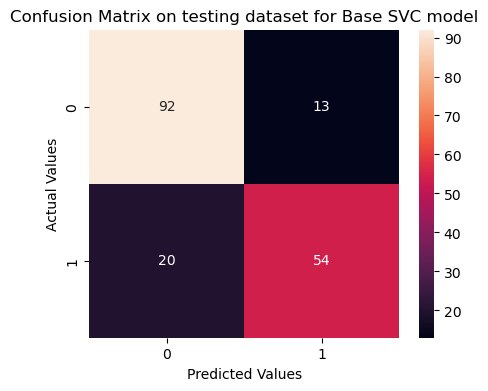

In [134]:
model = SVC(kernel = 'rbf',probability=True)
mdl=model.fit(X_train_scaled,y_train)
pred_train=mdl.predict(X_train_scaled)
pred_val=mdl.predict(X_val_scaled)
print(f"Classification Report using base {modelname} for Training dataset")
print(classification_report(y_train, pred_train))
print(f"Classification Report using base {modelname} for Val dataset")
print(classification_report(y_val, pred_val))
    
cm = metrics.confusion_matrix(y_val, pred_val)
cm_df = pd.DataFrame(cm)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Cross validation technique for the entire training dataset

In [135]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(mdl, X_rescaled, y, cv=10)
print(cv, cv.min(), cv.max(), cv.mean())

[0.8        0.84269663 0.7752809  0.87640449 0.80898876 0.80898876
 0.79775281 0.78651685 0.86516854 0.75280899] 0.7528089887640449 0.8764044943820225 0.8114606741573034


In [136]:
model=SVC(probability=True)
grid_search = GridSearchCV(estimator=model,
                            param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 
                            'C': [10, 1.0, 0.1, 0.01],
                            'gamma': ['scale']},
                            n_jobs=-1, 
                            cv=10,
                            scoring='accuracy',
                            refit=True)

In [137]:
mdl=grid_search.fit(X_train_scaled,y_train)

In [138]:
mdl.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [142]:
train_predict=mdl.predict(X_train_scaled)
val_predict=mdl.predict(X_val_scaled)

In [143]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       444
           1       0.88      0.69      0.77       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712



In [144]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



The confusion matrix is as follows


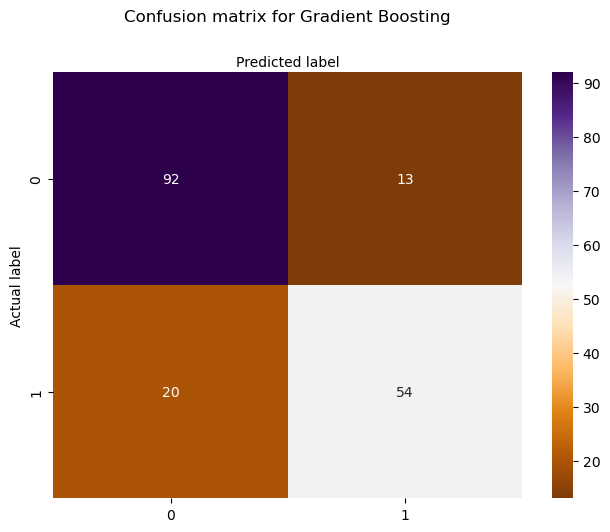

In [145]:
print("The confusion matrix is as follows")
class_names=["No","Yes"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_val, val_predict)), annot=True, cmap="PuOr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Gradient Boosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [146]:
X_test_scaled.head()

0         1         2         3         4         5         6   \
0 -0.476712 -0.518808  0.888226  0.724310  3.296463 -1.687794 -1.075907   
1 -0.492678 -0.518808  0.888226 -1.380624 -0.303355  0.592489 -1.075907   
2 -0.440929  1.927494 -1.125840  0.724310  3.296463 -1.687794 -1.075907   
3 -0.460666 -0.518808  0.888226  0.724310 -0.303355  0.592489  0.929448   
4 -0.390865 -0.518808  0.888226 -1.380624 -0.303355  0.592489  0.929448   

         7         8         9         10        11        12       13  \
0  1.799471 -0.220456 -0.719808 -0.198535 -0.136374 -0.092188 -0.21693   
1 -0.555719  4.536051  1.389259 -0.198535 -0.136374 -0.092188 -0.21693   
2 -0.555719 -0.220456 -0.719808 -0.198535 -0.136374 -0.092188 -0.21693   
3 -0.555719 -0.220456 -0.719808 -0.198535 -0.136374 -0.092188 -0.21693   
4 -0.555719 -0.220456  1.389259 -0.198535 -0.136374 -0.092188 -0.21693   

         14        15        16        17      18        19  
0 -0.507888  0.838659 -0.390005 -0.037503 -0.1066 -0.084096  
1 -0.507888 -1.192379  2.564073 -0.037503 -0.1066 -0.084096  
2 -0.507888  0.838659 -0.390005 -0.037503 -0.1066 -0.084096  
3 -0.507888  0.838659 -0.390005 -0.037503 -0.1066 -0.084096  
4 -0.507888 -1.192379  2.564073 -0.037503 -0.1066 -0.084096

In [147]:
pred = mdl.predict(X_test_scaled)
submission = pd.DataFrame({
    "PassengerId":df_test["PassengerId"],
    "Survived":pred
})
submission.to_csv('./submission_svc.csv', index=False)